# 6.6: Sourcing & Analyzing Time Series Data

## 1 Importing Libraries and Data Set

In [25]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature.

plt.style.use('fivethirtyeight') # This is a styling option for how my plots will appear.

In [26]:
# Creating a Path
path = r'C:\Users\ivand\Desktop\6 Lesson Parts\6.6 Lesson Part'

In [27]:
# Importing Data set
df_NYB = pd.read_csv(os.path.join(path, 'CitiBikes_Test.csv'),index_col=False)

In [28]:
df_NYB

,Unnamed: 0,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_seconds,subscriber,year_of_birth,gender,start_of_ride_new,Start_Date,Start_Time
0,0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,2013-09-09 18:18:55,2013-09-09,18
1,1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,2013-09-12 18:38:53,2013-09-12,19
2,2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,2013-09-18 19:44:04,2013-09-18,20
3,3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,2013-09-28 11:54:37,2013-09-28,12
4,4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,2013-09-07 18:08:22,2013-09-07,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49913,49922,Sat,2013-09-21 18:39:20,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,1978,Unknown,2013-09-21 18:39:20,2013-09-21,19
49914,49923,Sat,2013-09-14 17:32:26,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970,Female,2013-09-14 17:32:26,2013-09-14,18
49915,49924,Sat,2013-09-07 18:08:21,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961,Female,2013-09-07 18:08:21,2013-09-07,18
49916,49925,Sat,2013-09-07 13:25:35,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,1978,Unknown,2013-09-07 13:25:35,2013-09-07,13


## 2 Data Checks and Wrangling and Preparing for Time-Series Analysis

In [29]:
# Changing "Start_Date" to "datetime"
df_NYB['Start_Date'] = pd.to_datetime(df_NYB['Start_Date'])

In [30]:
# Creating a "trip_count" column to count the trips for each date
df_NYB['trip_count'] = df_NYB.groupby(df_NYB['Start_Date'].dt.date)['start_station_name'].transform('count')

In [31]:
df_NYB['start_station_name'].value_counts().sum()

49918

In [32]:
dups = df_NYB['start_station_name'].duplicated()
dups

0        False
1        False
2        False
3        False
4        False
         ...  
49913     True
49914     True
49915     True
49916     True
49917     True
Name: start_station_name, Length: 49918, dtype: bool

In [33]:
# Creating a subset of the unique dates
df_subset = df_NYB.drop_duplicates(subset = ["Start_Date"])

In [34]:
# Creating a subset of just the 2 columns
df_new = df_subset[['Start_Date', 'trip_count']]

In [35]:
df_new

,Start_Date,trip_count
0,2013-09-09,1662
1,2013-09-12,1524
2,2013-09-18,1838
3,2013-09-28,1734
4,2013-09-07,1607
5,2013-09-27,1752
6,2013-09-29,1508
7,2013-09-21,1598
8,2013-09-20,1996
9,2013-09-03,1534


In [36]:
# Sorting the columns
sorted_df = df_new.sort_values(by='Start_Date', ascending=True)

In [37]:
sorted_df

,Start_Date,trip_count
26,2013-09-01,1190
132,2013-09-02,1041
9,2013-09-03,1534
37,2013-09-04,1768
23,2013-09-05,1618
11,2013-09-06,1718
4,2013-09-07,1607
21,2013-09-08,1572
0,2013-09-09,1662
61,2013-09-10,1807


In [38]:
# Indexing the "datetime" column
from datetime import datetime

df_new['datetime'] = pd.to_datetime(df_new['Start_Date']) # Create a datetime column from "Date.""
df_new = df_new.set_index('datetime') # Set the datetime as the index of the dataframe.
df_new.drop(['Start_Date'], axis=1, inplace=True) # Drop the "Date" column.
df_new.head()

,trip_count
datetime,
2013-09-09,1662
2013-09-12,1524
2013-09-18,1838
2013-09-28,1734
2013-09-07,1607


In [39]:
# Sorting the subset data
sorted_df_2 = df_new.sort_values(by='datetime', ascending=True)

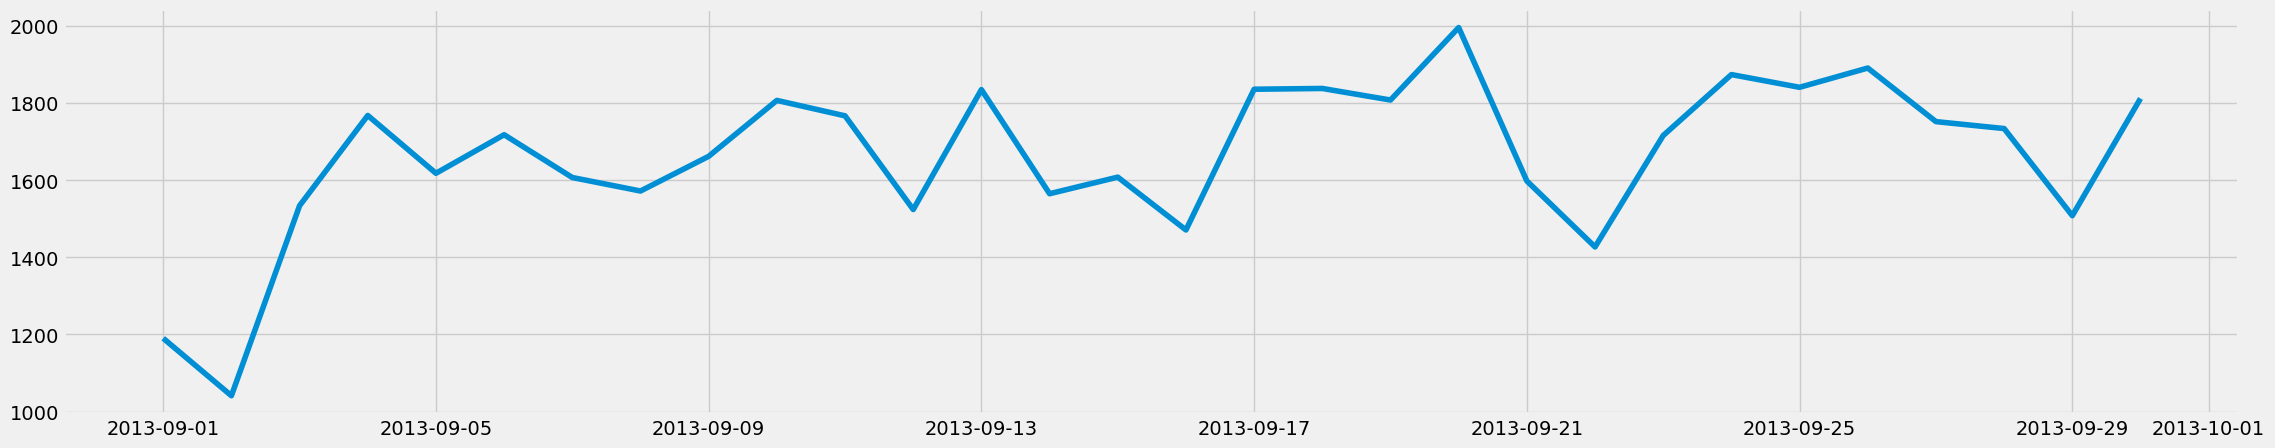

In [40]:
# Plotting the new data set

plt.figure(figsize=(25,5), dpi=100
        )
plt.plot(sorted_df_2)

In [41]:
# Checking for duplicates
dups = sorted_df_2.duplicated()
dups.sum()


0

## 3 Decompositioning the data

In [42]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(sorted_df_2, model='additive')

In [43]:
# Defining a fixed size for all special charts.
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

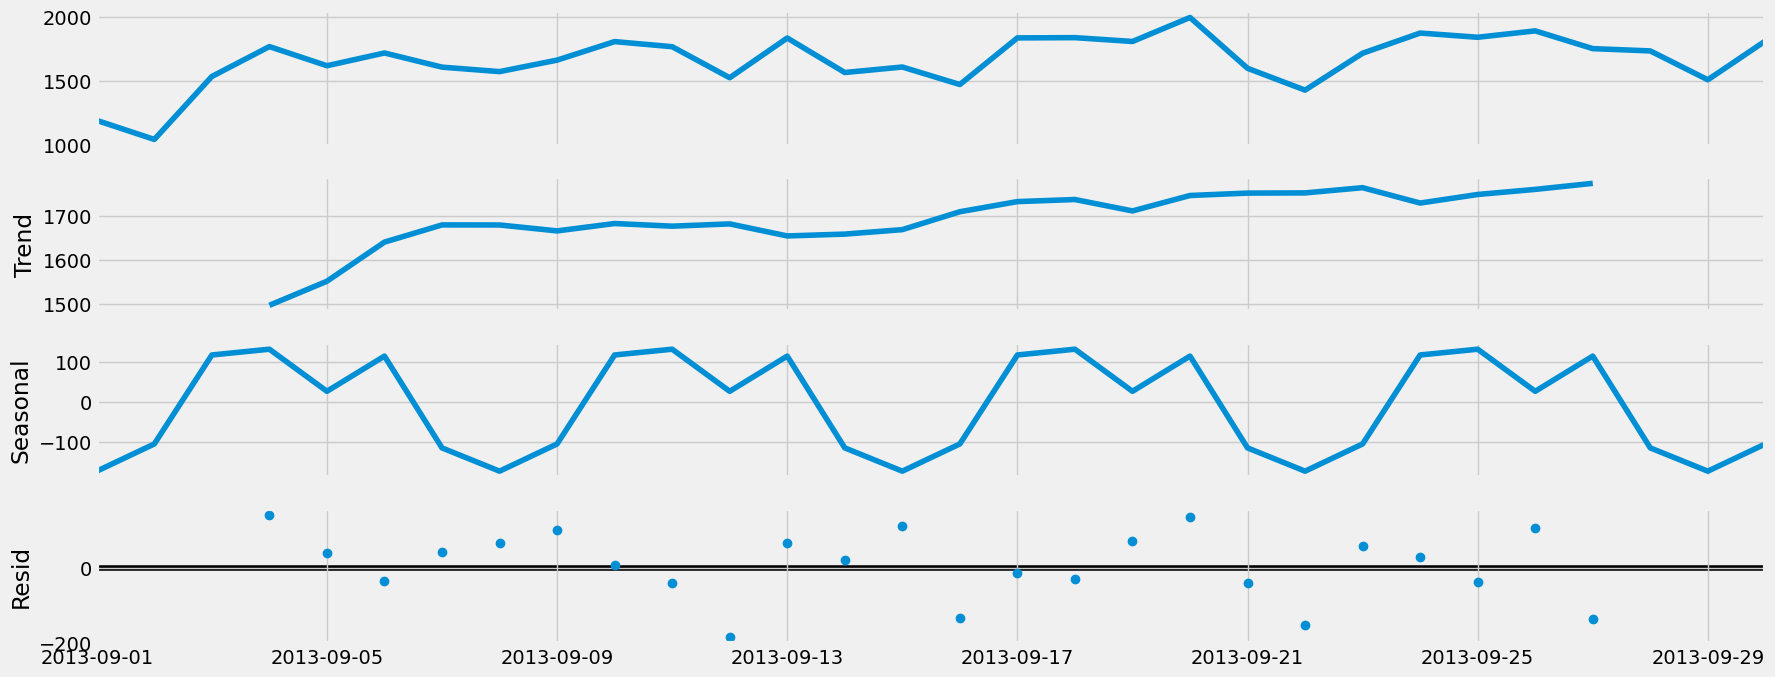

In [44]:
# Plotting the separate components

decomposition.plot()
plt.show()

- The trend line shows a pattern that bikes are used more often starting from the 6th of each month and slowly rising.
- The Seasonal line shows that Mon,Tue,Wed - there's a rise in bike usage. Thursday there's a fall. Friday there's a rise, and during the weekends there is a significant fall, which again supports the conclusion that bikes are used mainly during the week for a commuting purpouses.

## 4 Testing for Stationarity: Dickey-Fuller test

In [45]:
from statsmodels.tsa.stattools import adfuller # Importing the adfuller() function

def dickey_fuller(timeseries): # Defining the function
    # Performing the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Applying the test using the function on the time series
dickey_fuller(sorted_df_2['trip_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.870103
p-value                         0.002266
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


- The Test Statistic value is smaller than the critical value, therefore I can immediately reject the Null-hypothesis, which means my data is indeed stationary.

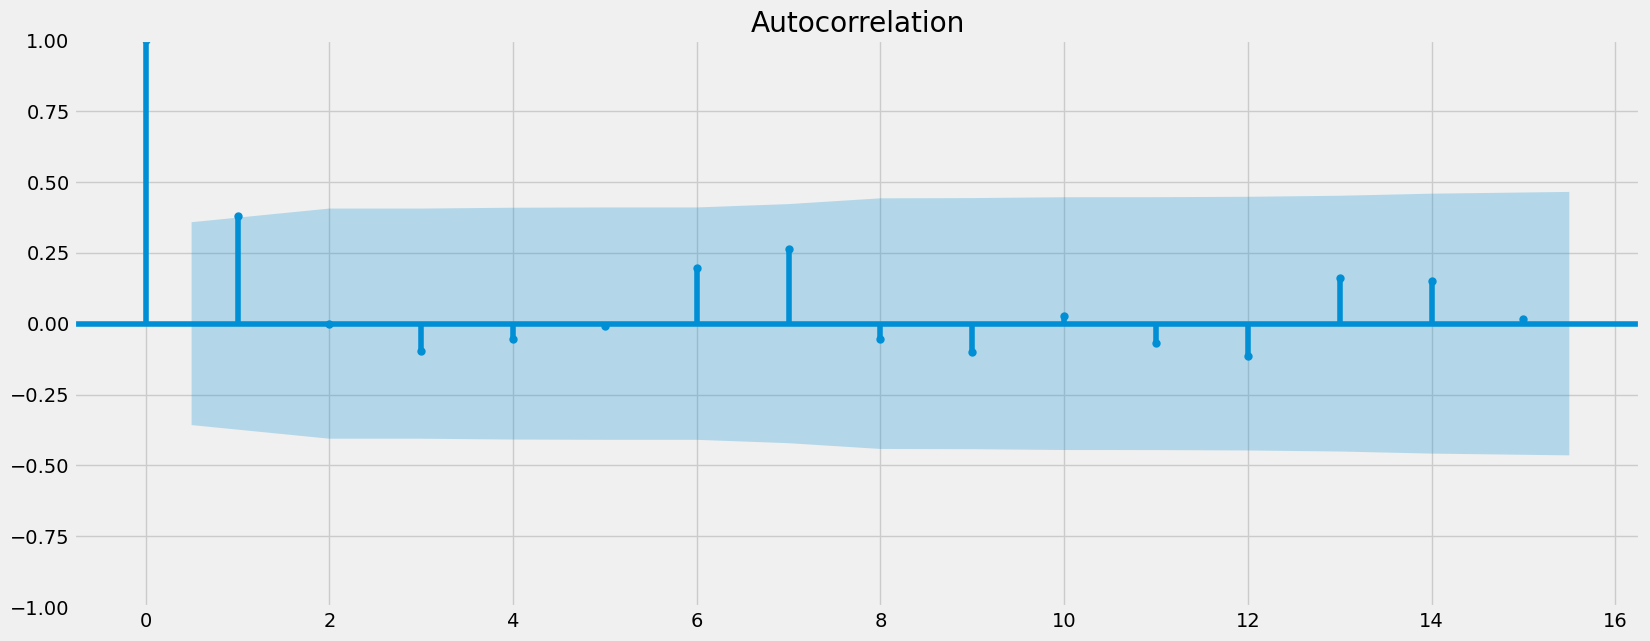

In [46]:
# Checking out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sorted_df_2)
plt.show()

- Almost all of my lags fit the autocorrelation confidence level blue area. Therefore yet another proving factor for Stationarity of my data set.